# Revisão de código 

Olá! 

Meu nome é Suelen. Estou feliz em revisar seu projeto hoje!

Quando vejo um erro pela primeira vez, apenas aponto. Deixarei você encontrá-lo e corrigi-lo sozinho. Além disso, ao longo do texto, farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Mas se você ainda não consegue lidar com essa tarefa, darei uma dica mais precisa na próxima iteração e também alguns exemplos práticos. Estarei aberta a feedbacks e discussões sobre o tema.

Você pode encontrar meus comentários em caixas verdes, amarelas ou vermelhas como estas:


<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>

Sucesso. Tudo está correto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário: </b> <a class="tocSkip"></a>

Observações. Algumas recomendações.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário: </b> <a class="tocSkip"></a>

O bloco requer algumas correções. O trabalho não pode ser aceito com os comentários vermelhos.
</div>

Você pode me responder usando isto:

<div class="alert alert-block alert-info">
<b>Resposta do aluno</b> <a class="tocSkip"></a>
</div>



<div class="alert alert-block alert-danger">

<b>Comentário geral v1: </b> <a class="tocSkip"></a>

Parabéns pelo desenvolvimento do projeto,Wail! 🎉

O seu trabalho já demonstra excelente qualidade. Para concluirmos a aprovação, precisamos fazer alguns ajustes. O ajuste principal é **fazer a análise por coortes**. Incluí comentários ao longo do código para te auxiliar nessa tarefa.
    
Fico à disposição para eventuais dúvidas. 

Boa sorte! 🍀
</div>

# Optimizing Company Marketing Expenses

You did very well in the TripleTen course and received an internship offer in the analytical department of Y.Afisha. Your first task is to help the company optimize its marketing expenses.

You have:

- Server logs with data on Y.Afisha accesses from January 2017 to December 2018

- A dump file with all orders made during the period

- Marketing expense statistics

You will analyze:

- How people use the product

- When they start buying

- How much revenue each customer generates for the company

- When the expenses will be covered

## Load data and prepare it for analysis

### Initialization

In [2]:
# Load the libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns

### Load Data

In [3]:
# Laod data for accessesss to Y.Afisha company between January 2017 and December 2018
visits_df = pd.read_csv("/datasets/visits_log_us.csv")
visits_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 79.3 MB


In [4]:
# Changes data type in order to reduce data size
visits_df = pd.read_csv("/datasets/visits_log_us.csv", dtype={'Device': 'category'}, parse_dates = ['Start Ts', 'End Ts'])
visits_df.columns = visits_df.columns.str.lower() #change columns names to lowercase
visits_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end ts     359400 non-null  datetime64[ns]
 2   source id  359400 non-null  int64         
 3   start ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [5]:
# Laod data for orders made between January 2017 and December 2018
orders_df = pd.read_csv("/datasets/orders_log_us.csv")
orders_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 4.4 MB


In [6]:
# Changes data type in order to reduce data size
orders_df = pd.read_csv("/datasets/orders_log_us.csv", parse_dates = ["Buy Ts"])
orders_df.columns = orders_df.columns.str.lower() #change columns names to lowercase
orders_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [7]:
# Laod data for marketing expenses
costs_df = pd.read_csv("/datasets/costs_us.csv")
costs_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 206.2 KB


In [8]:
# Changes data type in order to reduce data size
costs_df = pd.read_csv("/datasets/costs_us.csv",  parse_dates = ["dt"])
costs_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>

Leitura e processamento de dados corretas.
</div>

## Report and Metrics Calculation
Build graphs to see how these metrics differ for various devices and different ad sources, and how they change over time. 

### Product

#### How many people use it each day, week and month?

In [9]:
# Users per day
users_per_day = visits_df.groupby(visits_df['start ts'].dt.date).agg({'uid': ['nunique']})

# Users per week
users_per_week = visits_df.groupby(visits_df['start ts'].dt.to_period('W')).agg({'uid': ['nunique']})

# Users per month
users_per_month = visits_df.groupby(visits_df['start ts'].dt.month).agg({'uid': ['nunique']})

print("Users per day:\n", users_per_day.head(10))
print("Users per week:\n", users_per_week.head(10))
print("Users per month:\n", users_per_month)

Users per day:
                uid
           nunique
start ts          
2017-06-01     605
2017-06-02     608
2017-06-03     445
2017-06-04     476
2017-06-05     820
2017-06-06     797
2017-06-07     699
2017-06-08     868
2017-06-09     695
2017-06-10     350
Users per week:
                           uid
                      nunique
start ts                     
2017-05-29/2017-06-04    2021
2017-06-05/2017-06-11    4129
2017-06-12/2017-06-18    2812
2017-06-19/2017-06-25    2878
2017-06-26/2017-07-02    3064
2017-07-03/2017-07-09    3294
2017-07-10/2017-07-16    4355
2017-07-17/2017-07-23    3841
2017-07-24/2017-07-30    2655
2017-07-31/2017-08-06    2364
Users per month:
              uid
         nunique
start ts        
1          28716
2          28749
3          27473
4          21008
5          20701
6          13259
7          14183
8          11631
9          18975
10         29692
11         32797
12         31557


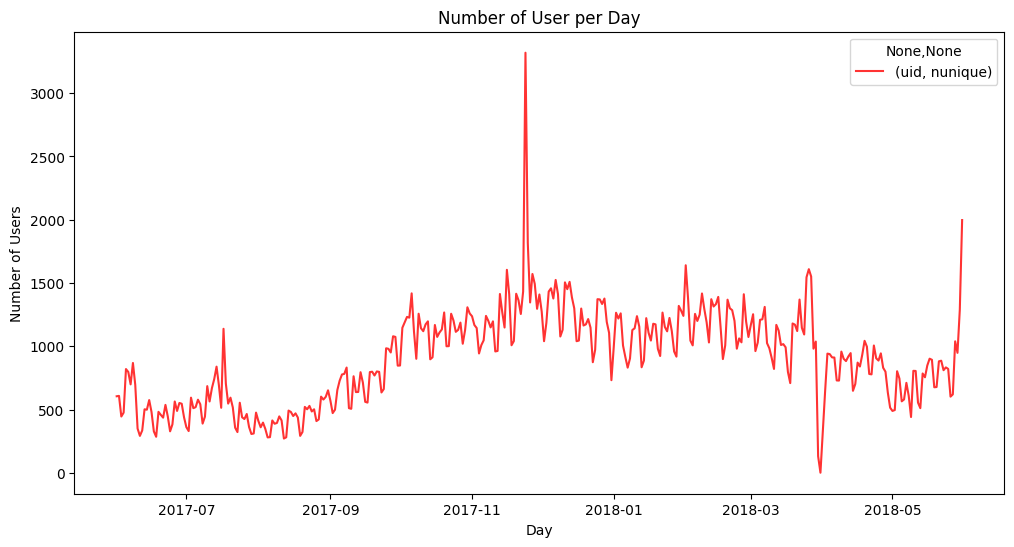

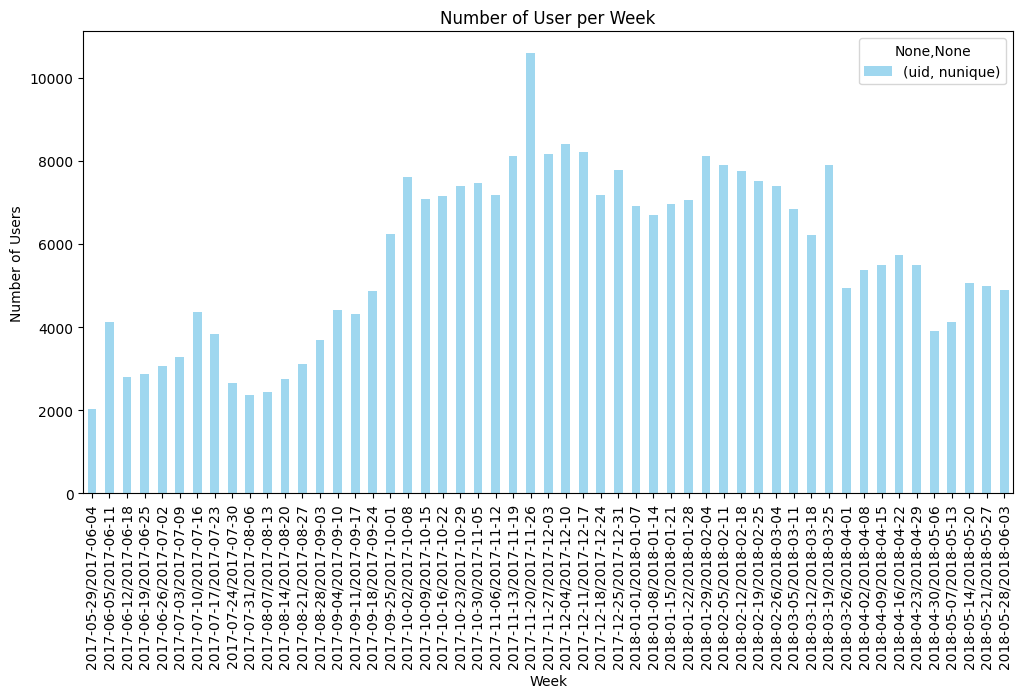

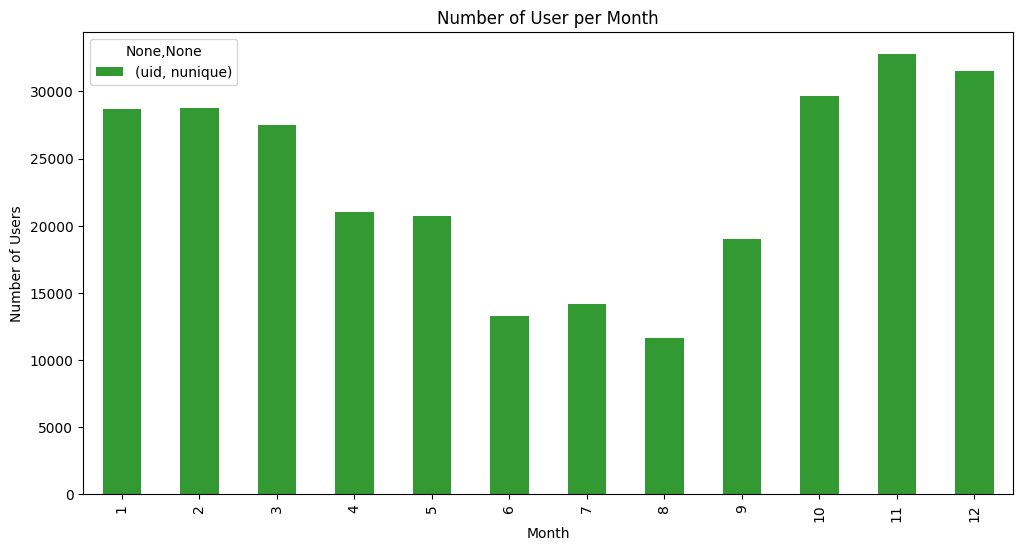

In [10]:
#Plot Graphs
users_per_day.plot(kind='line', figsize=(12, 6), alpha=0.8, color='red')
plt.title('Number of User per Day')
plt.xlabel('Day')
plt.ylabel('Number of Users')

users_per_week.plot(kind='bar', figsize=(12, 6), alpha=0.8, color='skyblue')
plt.title('Number of User per Week')
plt.xlabel('Week')
plt.ylabel('Number of Users')

users_per_month.plot(kind='bar', figsize=(12, 6), alpha=0.8, color='green')
plt.title('Number of User per Month')
plt.xlabel('Month')
plt.ylabel('Number of Users')

plt.show()

#### How many sessions are there per day? (One user can perform multiple sessions).

In [11]:
# Sessions per day
sessions_per_day = visits_df.groupby(visits_df['start ts'].dt.date)['uid'].count()

print("Seesions per day:\n", sessions_per_day.head(10))

Seesions per day:
 start ts
2017-06-01    664
2017-06-02    658
2017-06-03    477
2017-06-04    510
2017-06-05    893
2017-06-06    875
2017-06-07    788
2017-06-08    939
2017-06-09    755
2017-06-10    375
Name: uid, dtype: int64


#### How long is each session?

In [12]:
# Session duration
visits_df['session_duration'] = (visits_df['end ts'] - visits_df['start ts']).dt.total_seconds()

print("Session Duration:\n", visits_df[['uid', 'session_duration']].head(10))

Session Duration:
                     uid  session_duration
0  16879256277535980062            1080.0
1    104060357244891740            1680.0
2   7459035603376831527               0.0
3  16174680259334210214            1440.0
4   9969694820036681168               0.0
5  16007536194108375387              60.0
6   6661610529277171451            3360.0
7  11423865690854540312              60.0
8   2987360259350925644             180.0
9   1289240080042562063              60.0


<AxesSubplot:>

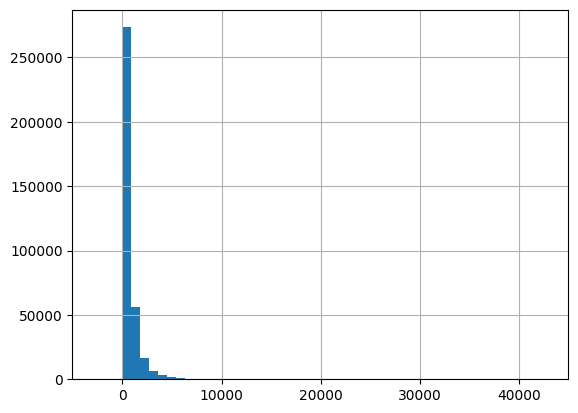

In [13]:
# Plot graph for duration
visits_df['session_duration'].hist(bins=50)

As we can see the majority of session durations are very short, with a significant number of sessions having durations close to zero.

The presence of session durations of exactly zero seconds suggests that there might be data recording issues or sessions that were initiated but not completed.

#### How often do users come back?

In [14]:
visits_df['activity_year'] = visits_df['start ts'].dt.year #add columns for the year
visits_df['activity_week'] = visits_df['start ts'].dt.week #add columns for the week

# Calculate first week for each user
if 'first_activity_year' not in visits_df.columns: #to not repeat the merge
    first_week = visits_df.groupby('uid')[['activity_year', 'activity_week']].min().reset_index()
    first_week.columns = ['uid', 'first_activity_year', 'first_activity_week']

    visits_df = visits_df.merge(first_week, on='uid') #Merge with the visits dataframe

# We have 2 years so in case same user visit the company the next year we should add 52 weeks from last year
visits_df['cohort_lifetime'] = (visits_df['activity_year'] - visits_df['first_activity_year']) * 52 + (visits_df['activity_week'] - visits_df['first_activity_week'])

#Create cohort
cohorts = visits_df.groupby(['first_activity_week', 'cohort_lifetime']).agg({'uid': 'nunique'}).reset_index()

#Initial users
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_week', 'uid']]
initial_users_count = initial_users_count.rename(columns={'uid': 'cohort_users'}) #rename column


#Merge dataframe
cohorts = cohorts.merge(initial_users_count, on='first_activity_week')

#Calculate retention rate

cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']

# Create pivot table

retention_pivot = cohorts.pivot_table(
    index='first_activity_week',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum'
)

retention_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
first_activity_week,,,,,,,,,,,,,,,,,,,,,
1,1.0,0.030194,0.014052,0.012913,0.012533,0.011964,0.008355,0.008166,0.009115,0.010065,...,0.016901,0.019939,0.018420,0.019749,0.016711,0.017281,0.015572,0.017660,0.018420,0.012913
2,1.0,0.041824,0.020703,0.019866,0.019030,0.016520,0.012547,0.014429,0.011711,0.013802,...,0.015266,0.015266,0.021539,0.016939,0.009410,0.014429,0.016939,0.014220,0.012129,NaN
3,1.0,0.034675,0.029494,0.017338,0.015145,0.016939,0.014548,0.011558,0.011359,0.013153,...,0.010961,0.013153,0.013551,0.007573,0.007573,0.012356,0.012156,0.008171,NaN,NaN
4,1.0,0.042507,0.023725,0.018584,0.015421,0.013246,0.011862,0.009688,0.012456,0.007908,...,0.006722,0.007315,0.006524,0.006129,0.008897,0.007908,0.005536,NaN,NaN,NaN
5,1.0,0.047474,0.024159,0.017064,0.016895,0.013854,0.008278,0.011657,0.007941,0.007603,...,0.006420,0.004393,0.004899,0.004562,0.006082,0.003717,NaN,NaN,NaN,NaN
6,1.0,0.038231,0.016913,0.016737,0.012333,0.010042,0.011628,0.006342,0.006166,0.006342,...,0.003876,0.004581,0.005638,0.003700,0.003347,NaN,NaN,NaN,NaN,NaN
7,1.0,0.038994,0.025692,0.015124,0.013848,0.014759,0.010569,0.007835,0.007835,0.006560,...,0.004191,0.005102,0.004191,0.004373,NaN,NaN,NaN,NaN,NaN,NaN
8,1.0,0.033213,0.019928,0.013475,0.014234,0.008541,0.007781,0.008541,0.008730,0.005883,...,0.004935,0.003796,0.003416,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1.0,0.032492,0.018203,0.018790,0.014093,0.009591,0.009004,0.007634,0.009004,0.005285,...,0.005872,0.002936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


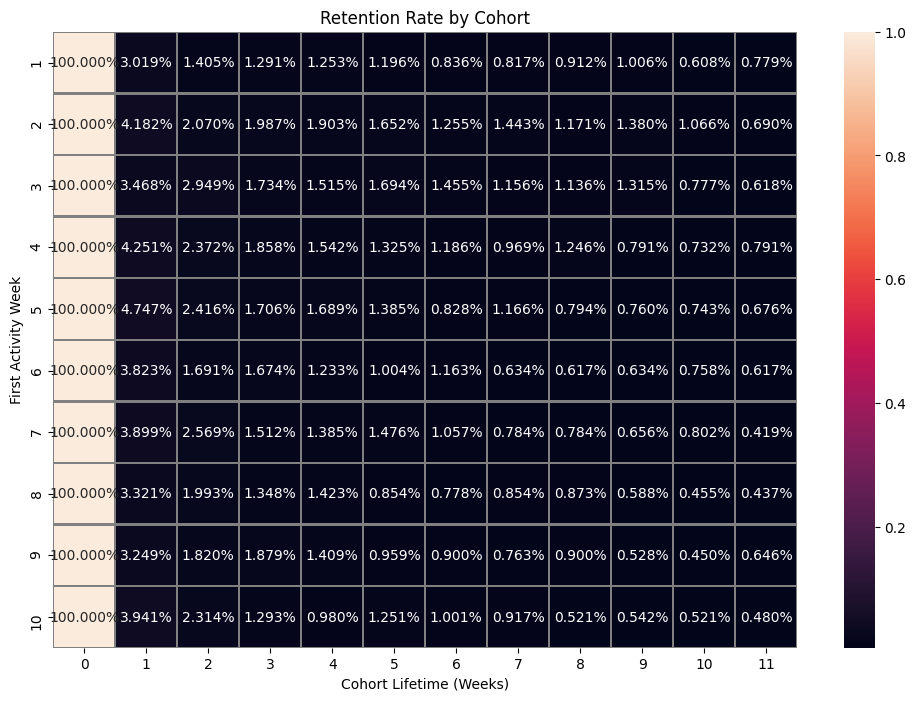

In [28]:
# Plot heatmap
#consider the first 12 weeks and the first 10 cohorts
filtered_retention_pivot = retention_pivot.iloc[:10, :12]
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_retention_pivot, annot=True, fmt=".3%", linewidths=1, linecolor='gray')
plt.title('Retention Rate by Cohort')
plt.xlabel('Cohort Lifetime (Weeks)')
plt.ylabel('First Activity Week')
plt.show()

<div class="alert alert-block alert-warning">
<b>Comentário: </b> <a class="tocSkip"></a>

Para facilitar a visualização dos dados, você pode filtrar uma parcela menor dos dados antes de criar a visualização. 
Exemplo: 
  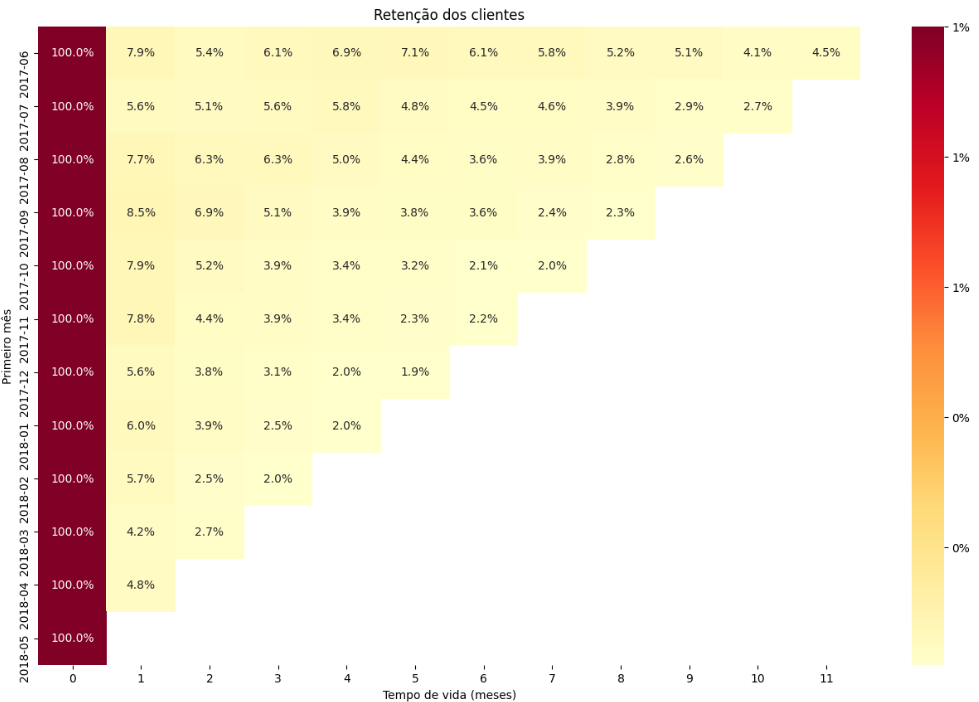   
</div>

We can condlude that initial weeks (cohort lifetime 0) generally exhibit high retention rates, indicating strong initial user interest and engagement. As time progresses (higher cohort lifetimes), retention rates decline, highlighting the challenge of maintaining long-term user engagement. Many cohorts eventually show NaN (Not a Number) as cohort lifetime increases, indicating that few users continue to engage over extended periods.

### Sales

#### When do people start buying? (In KPI analysis, we're usually interested in knowing the length of time between registration and conversion – when the user becomes a customer. For example, if a user's registration and first purchase occur on the same day, they may fall into the category of Conversion 0d. If the purchase is made the next day, this will be the 1d Conversion. You can use any approach that allows you to compare conversions from different cohorts, so you can determine which cohort or marketing channel has the most efficiency)

In [15]:
# First merge orders with user visit to get activity and order timestamps together
merged_data = pd.merge(visits_df, orders_df, on='uid', how='inner')

# Calculate time difference between first activity and purchase
merged_data['time to order'] = (merged_data['buy ts'] - merged_data['start ts']).dt.days
merged_data = merged_data[merged_data['buy ts'] >= merged_data['start ts']] # filter the data frame as negative data is not convinient

# create function to categorize the time of order

bins = [0, 1, 2, 3, 4, 5, 6, 7, 14, 30, 60, 90, 180, 365]
labels = ['0d', '1d', '2d', '3d', '4d', '5d', '6d', '1w', '2w', '1m', '2m', '3m', '6m', '1y'] 
def categorize_conversion_time(time_to_order):    
    for i in range(len(bins)):
        if time_to_order <= bins[i]:
            return labels[i]
    
    return '1y+'

# Apply categorization function
merged_data['conversion time'] = merged_data['time to order'].apply(categorize_conversion_time)

# Count conversions by each category
conversion_counts = merged_data['conversion time'].value_counts().reindex(labels)

print(conversion_counts)

0d    53424
1d     6922
2d     5338
3d     5451
4d     5022
5d     4327
6d     4179
1w     4494
2w    24981
1m    45311
2m    62413
3m    48131
6m    88094
1y    35817
Name: conversion time, dtype: int64


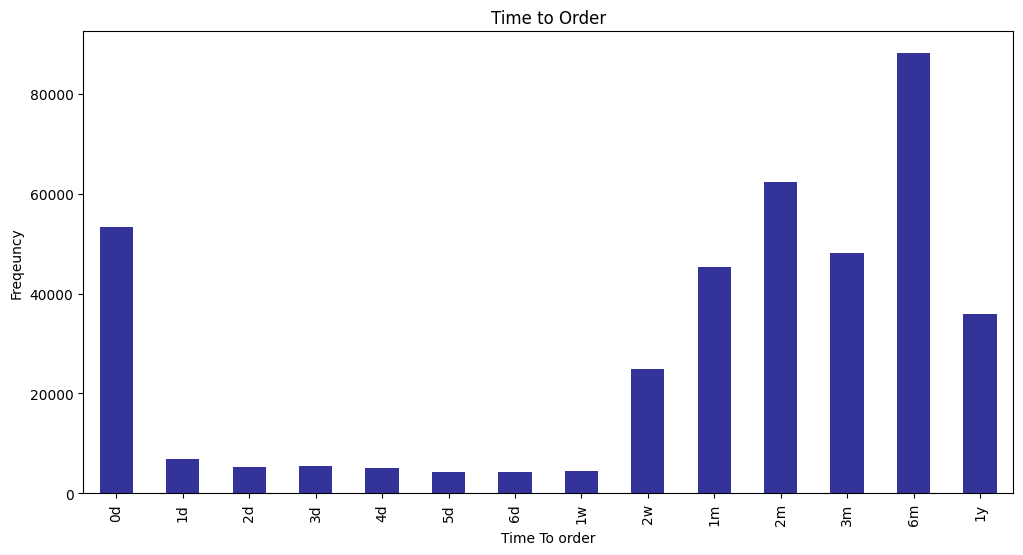

In [16]:
# Plot graph for categorization

conversion_counts.plot(kind='bar', figsize=(12, 6), alpha=0.8, color='navy')
plt.title('Time to Order')
plt.xlabel('Time To order')
plt.ylabel('Freqeuncy')

plt.show()

The analysis of conversion times shows that good number of users make their first purchase immediately (0d) after registration, with significant decrease occurring within the first few days and week.

The frequency of orders starts to increase within the second week reaching a peak of order after 6 months of the visit

#### How many orders do customers place during a given period of time?

In [17]:
# Group by 'uid' and count unique orders
orders_per_customer = orders_df.groupby('uid')['buy ts'].nunique()

print(orders_per_customer.value_counts())
print(orders_per_customer.mean())

1      30231
2       4395
3       1086
4        375
5        147
       ...  
48         1
50         1
38         1
115        1
127        1
Name: buy ts, Length: 62, dtype: int64
1.3803630588943954


We find that the average number of customer make one order after visiting the company, and that number of customer who makes more than 5 orders is very low (just 1 customer)

#### What is the average volume of a purchase?

In [18]:
# Calculate the average volume of purchase
average_purchase_volume = orders_df['revenue'].mean()

print(f"Average volume of a purchase: ${average_purchase_volume:.2f}")

Average volume of a purchase: $5.00


#### How much money do they bring to the company (LTV)?

In [35]:
#Calculate first order month for each user
first_orders = orders_df.groupby('uid')['buy ts'].min().reset_index()
first_orders.columns = ['uid', 'first_order_date']

first_orders['first_order_month'] = first_orders['first_order_date'].dt.to_period('M')

#Calculate cohort sizes
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']

#Merge order data with first order month
df_orders = orders_df.merge(first_orders[['uid', 'first_order_month']], on='uid')

#Calculate revenue by cohort and month
df_orders['order_month'] = df_orders['buy ts'].dt.to_period('M')

cohorts = df_orders.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum'}).reset_index()

#Merge cohort sizes with revenue data
report = cohort_sizes.merge(cohorts, on='first_order_month')

#Calculate LTV by cohort
margin_rate = 0.4

report['ltv'] = report['revenue'] / report['n_buyers'] * margin_rate

#Pivot data for visualization
ltv_pivot = report.pivot_table(
    index='first_order_month',
    columns='order_month',
    values='ltv',
    aggfunc='sum'
).fillna(0)

ltv_pivot

order_month,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06
first_order_month,,,,,,,,,,,,,
2017-06,1.889766,0.194131,0.175055,0.381869,0.409012,0.294201,0.380176,0.232637,0.221285,0.242315,0.228504,0.102742,0.000
2017-07,0.000000,2.404087,0.134084,0.249412,0.143590,0.070717,0.062419,0.048083,0.056728,0.064493,0.058858,0.062269,0.000
2017-08,0.000000,0.000000,2.110607,0.188797,0.183393,0.156511,0.197620,0.113416,0.084266,0.162003,0.116885,0.075191,0.000
2017-09,0.000000,0.000000,0.000000,2.257812,0.447034,0.208372,1.590317,0.160223,0.258827,0.280643,0.097260,0.073602,0.000
2017-10,0.000000,0.000000,0.000000,0.000000,2.001493,0.214305,0.076558,0.062858,0.060624,0.048145,0.033926,0.046188,0.000
2017-11,0.000000,0.000000,0.000000,0.000000,0.000000,2.061873,0.159693,0.079823,0.129981,0.059205,0.021552,0.045971,0.000
2017-12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.895276,0.104150,0.370039,0.426110,0.125172,0.135219,0.000
2018-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.654254,0.117903,0.121712,0.057111,0.025079,0.000
2018-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.662795,0.111310,0.031406,0.029658,0.000


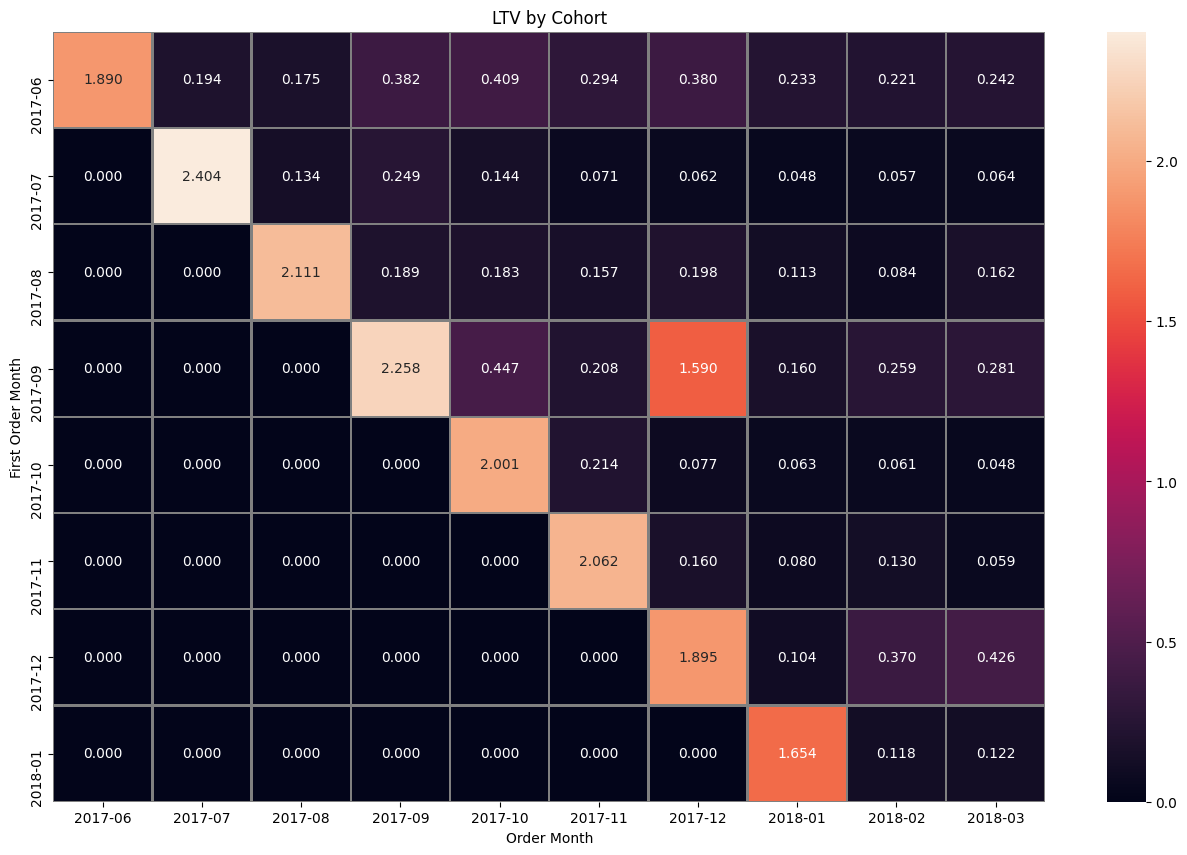

In [36]:
# Plot Heatmap
filtered_ltv_pivot = ltv_pivot.iloc[:8, :10] #Filter data for visualization

plt.figure(figsize=(16, 10))
sns.heatmap(filtered_ltv_pivot, annot=True, fmt=".3f", linewidths=1, linecolor='gray')
plt.title('LTV by Cohort')
plt.xlabel('Order Month')
plt.ylabel('First Order Month')
plt.show()

The first month of each cohort shows the highest LTV, indicating that initial purchases contribute significantly to revenue. However, subsequent months generally see a steep drop in LTV.

Cohorts like 2017-06, 2017-08, and 2017-09 show some sustained contributions over multiple months, but the values decrease and stabilize at lower levels.

Certain months show dramatic increases in LTV, such as the September 2017 cohort in its third month and the December 2017 cohort in its seventh month. These peaks highlight periods where marketing or retention strategies were particularly effective.

More recent cohorts (2018-04, 2018-05) show lower LTVs initially, possibly indicating less effective acquisition or engagement strategies compared to earlier cohorts.

The LTV tends to decline over time, emphasizing the importance of retention strategies to maintain customer engagement and spending.

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
A análise LTV também deve ser feita por coorte. 

Exemplo: 
    
```python 
#calculando a quantidade de dinheiro que o usuários trazem para a empresa (lifetime value)

#derivando a coluna first_order_month
first_orders = first_order.copy()
first_orders['first_order_month'] = first_orders['first_order_date'].dt.to_period('M')

#calculando o número de clientes, por mês da primeira compra
cohort_sizes = (
    first_orders.groupby('first_order_month')
    .agg({'uid': 'nunique'})
    .reset_index())
cohort_sizes.columns = ['first_order_month', 'n_buyers']

margin_rate = 0.4

#mesclando as informações de pedidos com a primeira compra por cliente
df_orders_ = pd.merge(df_orders, first_orders, on='uid')

#calculando a receita por coorte e mês
cohorts = (
    df_orders_.groupby(['first_order_month', 'order_month'])
    .agg({'revenue': 'sum'})
    .reset_index())

#mesclando o tamanho da coorte com a receita
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')

```

</div>

### Marketing

#### How much money was spent? Total/by source/over time

In [25]:
#Total money spent
total_money_spent = costs_df['costs'].sum()
print(f"Total money spent: ${total_money_spent:.2f}")

#Money spent by source
money_spent_by_source = costs_df.groupby('source_id')['costs'].sum().reset_index()
money_spent_by_source.columns = ['source_id', 'total_costs']
print(money_spent_by_source)

#Money spent over time (month)

money_spent_over_time = costs_df.groupby(costs_df['dt'].dt.to_period('M'))['costs'].sum().reset_index()
money_spent_over_time.columns = ['month', 'total_costs']
print(money_spent_over_time)

Total money spent: $329131.62
   source_id  total_costs
0          1     20833.27
1          2     42806.04
2          3    141321.63
3          4     61073.60
4          5     51757.10
5          9      5517.49
6         10      5822.49
      month  total_costs
0   2017-06     18015.00
1   2017-07     18240.59
2   2017-08     14790.54
3   2017-09     24368.91
4   2017-10     36322.88
5   2017-11     37907.88
6   2017-12     38315.35
7   2018-01     33518.52
8   2018-02     32723.03
9   2018-03     30415.27
10  2018-04     22289.38
11  2018-05     22224.27


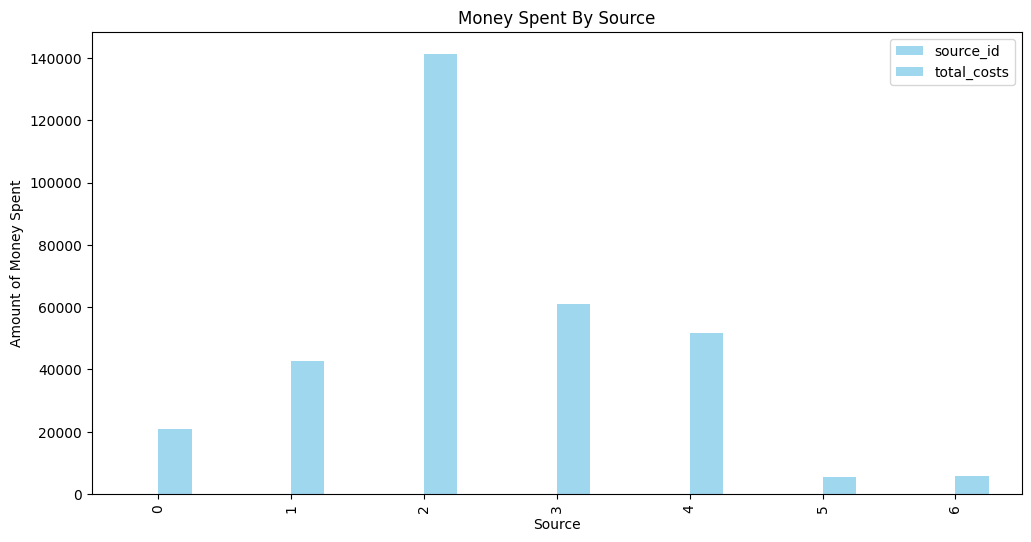

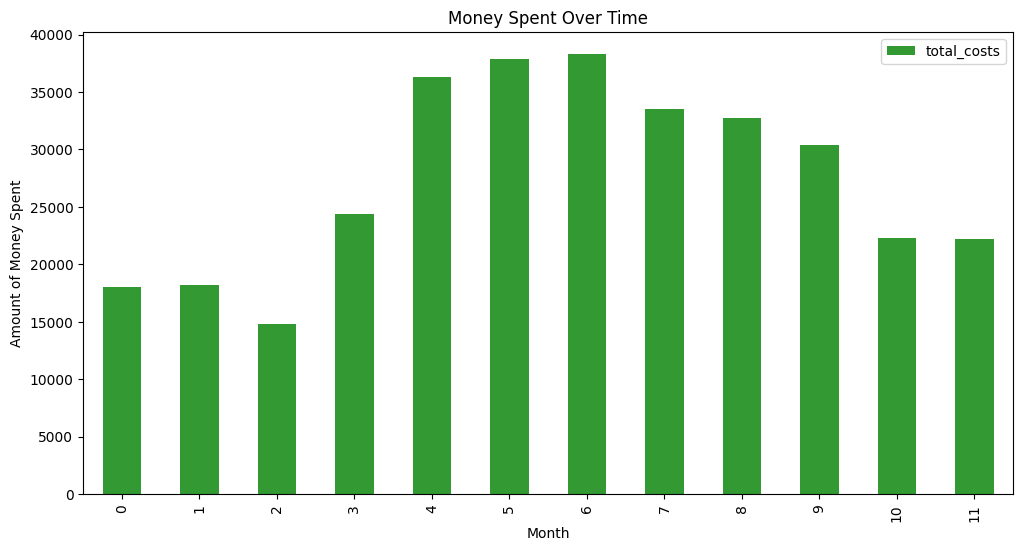

In [26]:
#Plot Graphs
money_spent_by_source.plot(kind='bar', figsize=(12, 6), alpha=0.8, color='skyblue')
plt.title('Money Spent By Source')
plt.xlabel('Source')
plt.ylabel('Amount of Money Spent')

money_spent_over_time.plot(kind='bar', figsize=(12, 6), alpha=0.8, color='green')
plt.title('Money Spent Over Time')
plt.xlabel('Month')
plt.ylabel('Amount of Money Spent')

plt.show()

We can conlude that there is a significant difference in spending across different sources, indicating varied investment strategies or campaign sizes.

Source 3 has the highest total costs, amounting to $ 141321.63. Source 9 and Source 10 have the lowest total costs, at $ 5517.49 and $ 5822.49, respectively.

#### How much did it cost to acquire customers for each source?

In [45]:
# Calculate the number of unique customers per source
customers_by_source = visits_df.groupby('source id')['uid'].nunique().reset_index()
customers_by_source.columns = ['source_id', 'unique_customers']

# Calculate total costs by source
costs_by_source = costs_df.groupby('source_id')['costs'].sum().reset_index()
costs_by_source.columns = ['source_id', 'total_costs']

# Merge dataframes
cac_df = costs_by_source.merge(customers_by_source, on='source_id')
cac_df['cac'] = cac_df['total_costs'] / cac_df['unique_customers']

print(cac_df[['source_id', 'total_costs', 'unique_customers', 'cac']])

   source_id  total_costs  unique_customers       cac
0          1     20833.27             18999  1.096546
1          2     42806.04             26245  1.631017
2          3    141321.63             74756  1.890439
3          4     61073.60             83525  0.731201
4          5     51757.10             56974  0.908434
5          9      5517.49              9264  0.595584
6         10      5822.49              8067  0.721766


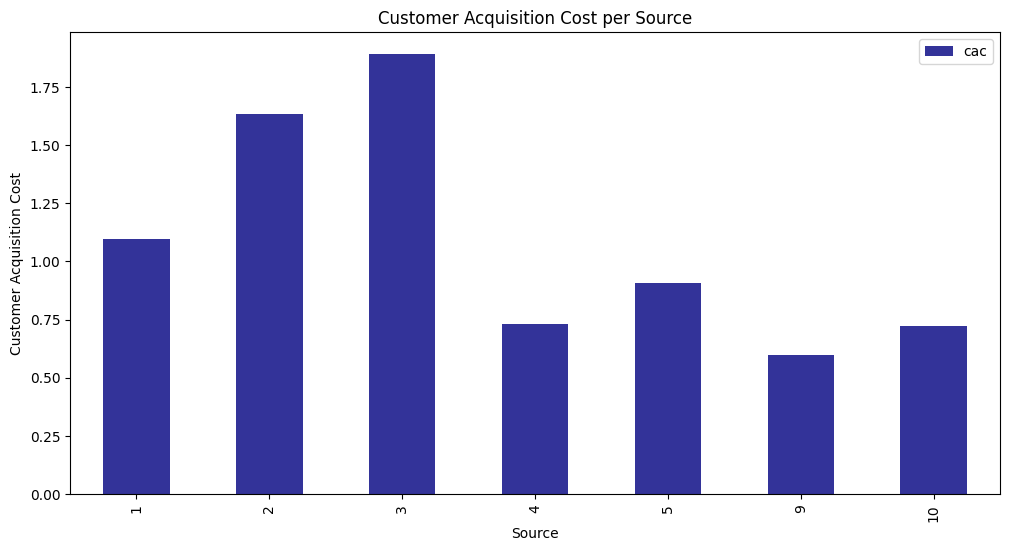

In [37]:
#Plot Graphs

cac_df.plot(kind='bar', x = 'source_id', y = 'cac', figsize=(12, 6), alpha=0.8, color='navy')
plt.title('Customer Acquisition Cost per Source')
plt.xlabel('Source')
plt.ylabel('Customer Acquisition Cost')

plt.show()

We find that, sources 4, 5, 9, and 10 have relatively lower CACs compared to sources 1, 2, and 3. This suggests that these sources may be more efficient in acquiring customers at a lower cost.

#### Were the investments worth it? (ROMI)

In [40]:
#Calculate revenue and costs by cohort and source

#Merge the first order month back to the orders_df
orders_df = orders_df.merge(first_orders[['uid', 'first_order_month']], on='uid')
orders_df['order_month'] = orders_df['buy ts'].dt.to_period('M')

# Merge orders with visits to associate each order with its source
merged_df = orders_df.merge(visits_df[['uid', 'source id', 'start ts']], on='uid')
merged_df['cohort'] = merged_df['start ts'].dt.to_period('M')

# Group by cohort and source to get total revenue
cohort_revenue = merged_df.groupby(['cohort', 'source id'])['revenue'].sum().reset_index()

# Calculate total costs by cohort and source from costs_df
costs_df['cohort'] = costs_df['dt'].dt.to_period('M')
cohort_costs = costs_df.groupby(['cohort', 'source_id'])['costs'].sum().reset_index()

# Merge revenue and costs data
cohort_data = cohort_revenue.merge(cohort_costs, left_on=['cohort', 'source id'], right_on=['cohort', 'source_id'])


#Calculate ROMI
cohort_data['romi'] = (cohort_data['revenue'] - cohort_data['costs']) / cohort_data['costs']

# Pivot the data
romi_pivot = cohort_data.pivot_table(index='cohort', columns='source id', values='romi', aggfunc='mean')

romi_pivot

source id,1,2,3,4,5,9,10
cohort,,,,,,,
2017-06,93.203472,32.329153,0.260038,6.329962,9.960021,4.256153,1.253994
2017-07,69.512816,27.935485,0.582289,4.806087,14.114364,4.140874,2.827027
2017-08,72.377082,36.538693,1.145100,6.074940,23.063466,5.400595,1.199897
2017-09,103.448705,42.815743,1.055509,5.746683,87.948705,8.374212,-0.072047
2017-10,101.270185,36.616060,0.505401,6.869070,16.304409,3.727310,0.587431
2017-11,110.253525,52.187384,1.037723,9.568609,12.418289,4.986431,1.424441
2017-12,123.194601,112.185393,2.175714,8.926669,18.499244,4.717742,0.037810
2018-01,90.358868,59.193608,0.742104,7.714008,13.420674,3.561609,2.811394
2018-02,94.488936,69.673355,0.743053,7.383196,23.055928,5.710082,2.695329


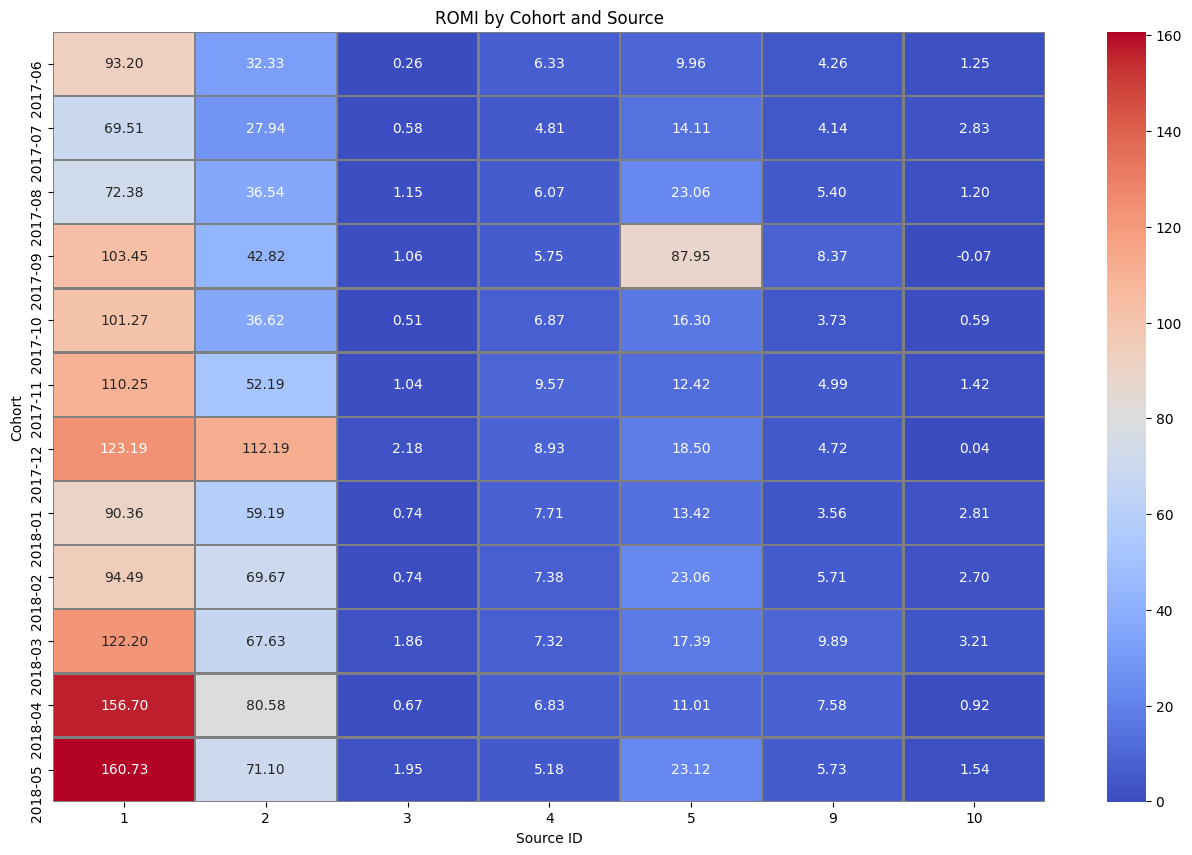

In [41]:
#ROMI heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(romi_pivot, annot=True, fmt=".2f", linewidths=1, linecolor='gray', cmap='coolwarm')
plt.title('ROMI by Cohort and Source')
plt.xlabel('Source ID')
plt.ylabel('Cohort')
plt.show()

Sources 1 and 2 consistently show high ROMI across various cohorts. For instance, Source 1's ROMI ranges from 69.51 to 160.73, indicating significant profitability. Similarly, Source 2 also displays strong returns, with ROMI values often exceeding 30 and even reaching 112.19 in December 2017. These sources are highly efficient in generating revenue relative to the costs incurred.

Source 3 consistently shows very low or near-zero ROMI, with values typically around 0.26 to 2.17. This indicates poor returns on marketing investments, suggesting that the revenue generated barely covers the costs.

Source 4 has ROMI values typically between 5 and 9, suggesting steady returns. Source 5 shows a bit more variability but still maintains decent profitability, with notable peaks such as 23.06 in February 2018 and 23.12 in May 2018. These sources show moderate but consistent ROMI. 

Source 9 exhibits significant variability in ROMI, ranging from as low as 3.73 to highs around 9.88. This suggests that the return on investment from this source can be unpredictable, possibly due to varying marketing effectiveness or external market conditions.

Source 10 generally low ROMI with occasional spikes, indicating inconsistent performance. While there are periods of profitability, such as 3.21 in March 2018, the overall return is relatively low.

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
  
- Aqui você precisa calcular o `ROMI` por cohort também. Você pode fazer como mostrado na figura abaixo (por cohort e origem)
    
    
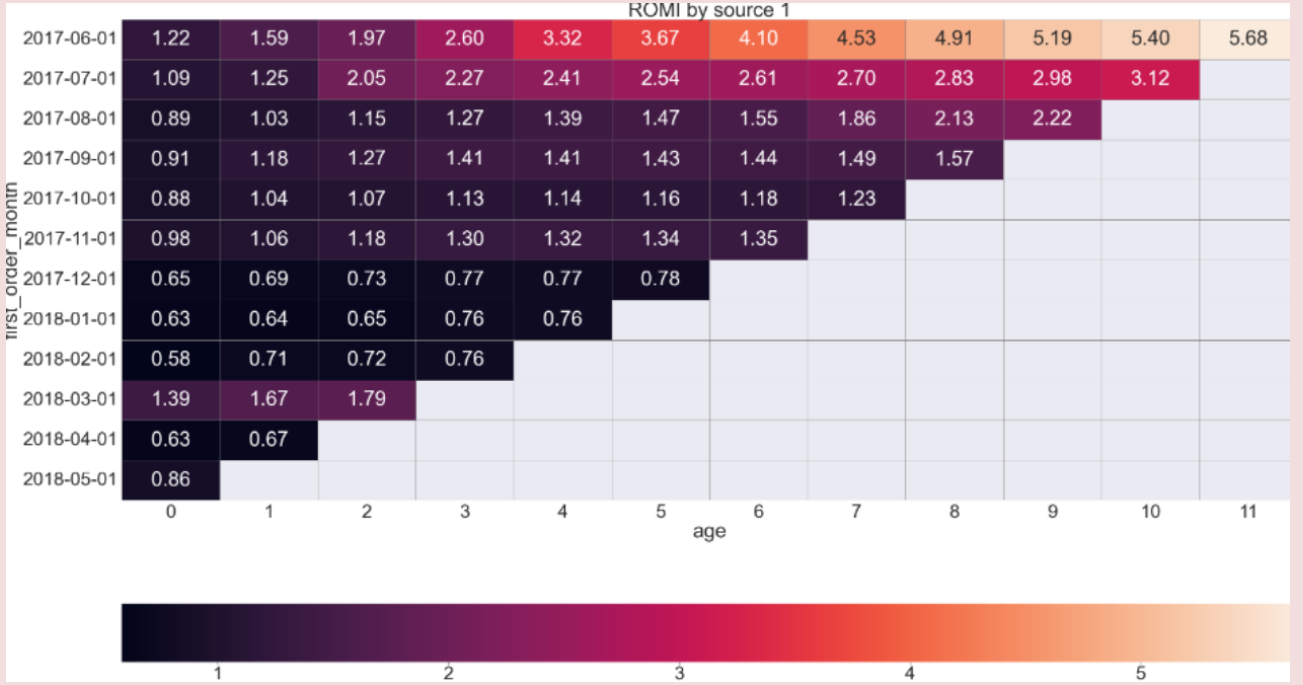
    
Uma outra alternativa é fazer como mostrado na tabela abaixo, por cohort e plotar um gráfico de área ou linha com o acumulado por mês e origem.
  
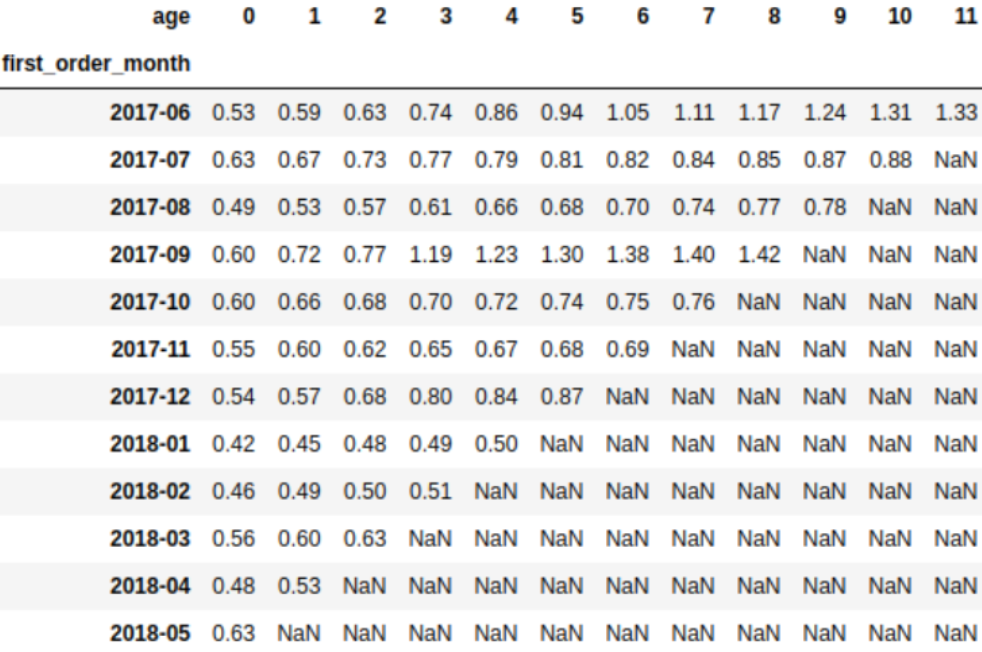

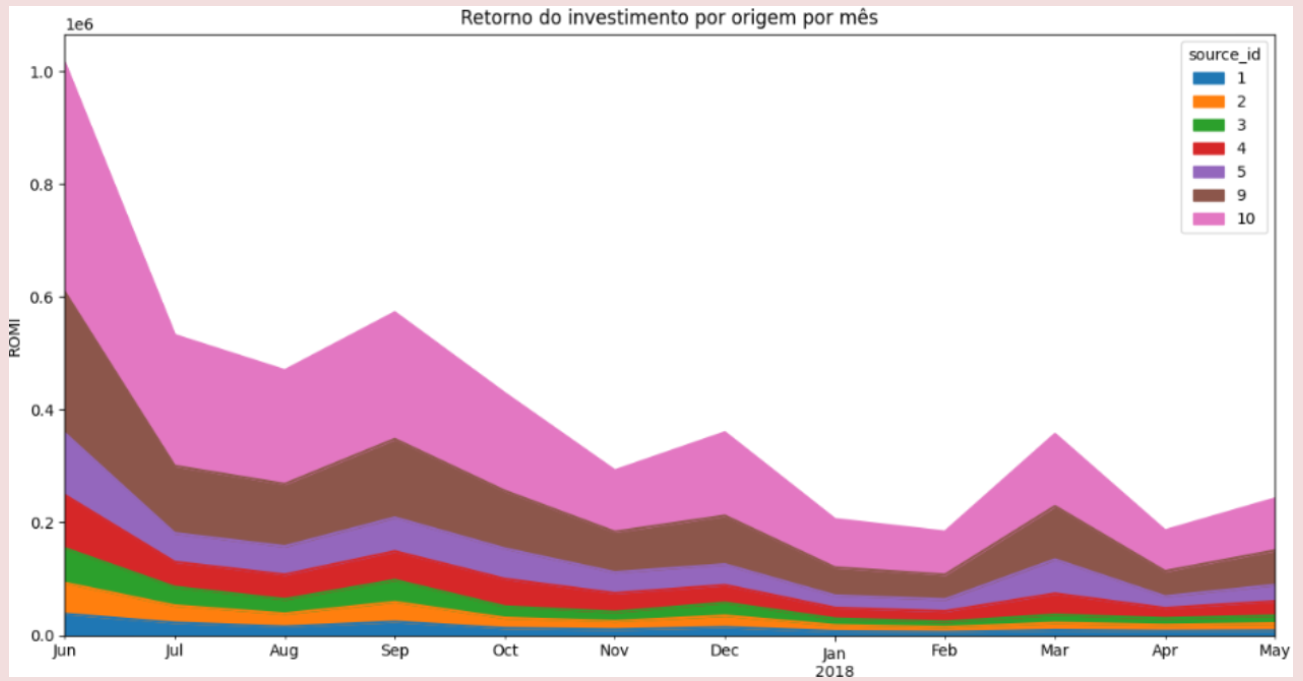


## Conclusion: Recommend to marketers how much money and where it would be best to invest.

From data resulted above we can reach a conclusion that:

Given the high initial LTV, marketers should invest in strategies that enhance early user engagement and retention to maximize the lifetime value. Moreover, marketers need to develop and implement robust retention strategies to maintain customer engagement and spending beyond the first few months. Also, leverage seasonal trends and promotions to boost LTV during specific periods. In adddition, use the insights from high-performing cohorts to tailor marketing efforts and improve the performance of more recent cohorts.

Marketers should focus more resources on sources 1 and 2, as they consistently deliver high returns. Also, they should evaluate the strategies used for sources 4, 5, and 9 to understand the factors driving moderate and variable performance. Consider optimizing marketing efforts to improve consistency and returns. Given the consistently low or negative ROMI for source 3, it may be wise to reevaluate the strategy or discontinue investments in this source unless improvements can be identified and implemented. Furthermore, understanding the seasonal peaks can help marketers in allocating budgets more effectively during high-return periods.

Marketers must prioritize sources with lower CACs like 4, 5, 9, and 10 to maximize efficiency in acquiring new customers.